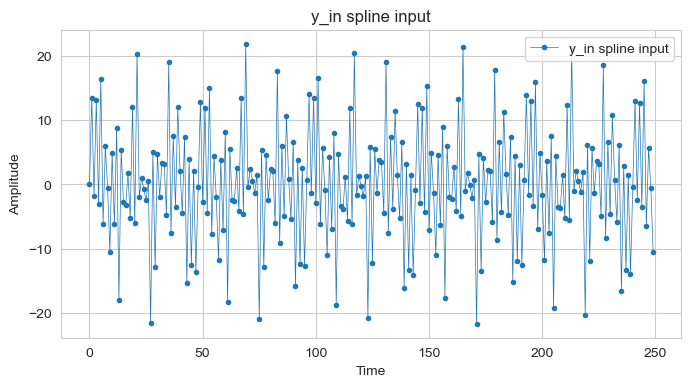

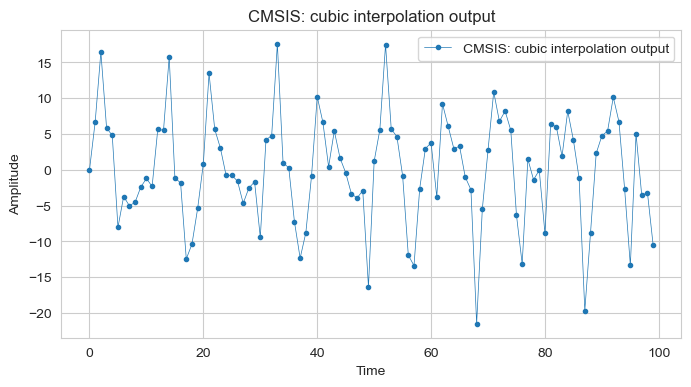

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style(style='whitegrid')

def plot_graph(input_array, title):
    plt.figure(figsize=(8, 4))
    plt.plot(input_array, marker='.', linewidth=0.5, label=title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.legend()
    plt.show()
    
def plot_input_output(input_array, output_array, title):
    plt.figure(figsize=(8, 4))
    plt.plot(input_array, linewidth=0.5, label='Input')
    plt.plot(output_array, linewidth=0.5, label='Output')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.legend()
    plt.show()

y_in = np.loadtxt('spline_y_in.csv', delimiter=',', dtype=float)
y_out = np.loadtxt('spline_y_out.csv', delimiter=',', dtype=float)

plot_graph(y_in, "y_in spline input")
plot_graph(y_out, "CMSIS: cubic interpolation output")

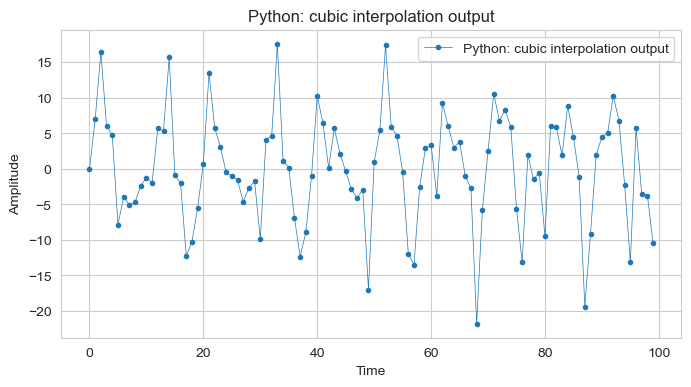

In [112]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

sns.set_style(style='whitegrid')

def interpolate(x, y, target_size):
    # Create a cubic spline interpolation
    cs = CubicSpline(x, y)
    
    # Generate new x values based on target size
    x_interp = np.linspace(x[0], x[-1], target_size)
    
    # Interpolate corresponding y values
    y_interp = cs(x_interp)
    
    return x_interp, y_interp

# Target size
target_size = len(y_out)

x_in = np.loadtxt('spline_x_in.csv', delimiter=',', dtype=float)
y_in = np.loadtxt('spline_y_in.csv', delimiter=',', dtype=float)

x_adjusted, y_adjusted = interpolate(x_in, y_in, target_size)

plot_graph(y_adjusted, "Python: cubic interpolation output")


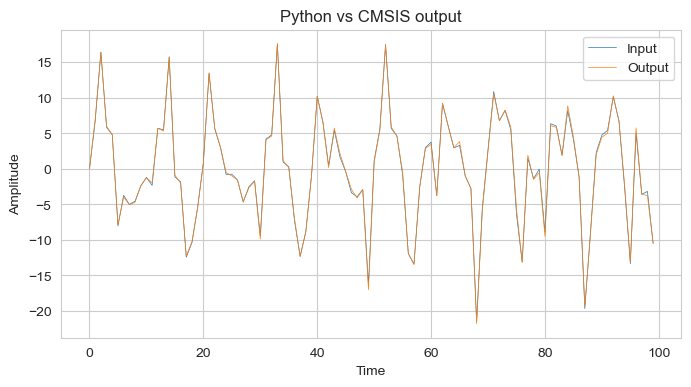

In [113]:
plot_input_output(y_out, y_adjusted, "Python vs CMSIS output")